<a href="https://colab.research.google.com/github/mdforhadcse/Data-Science-project/blob/main/Exploratory_Data_Analysis_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis
exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

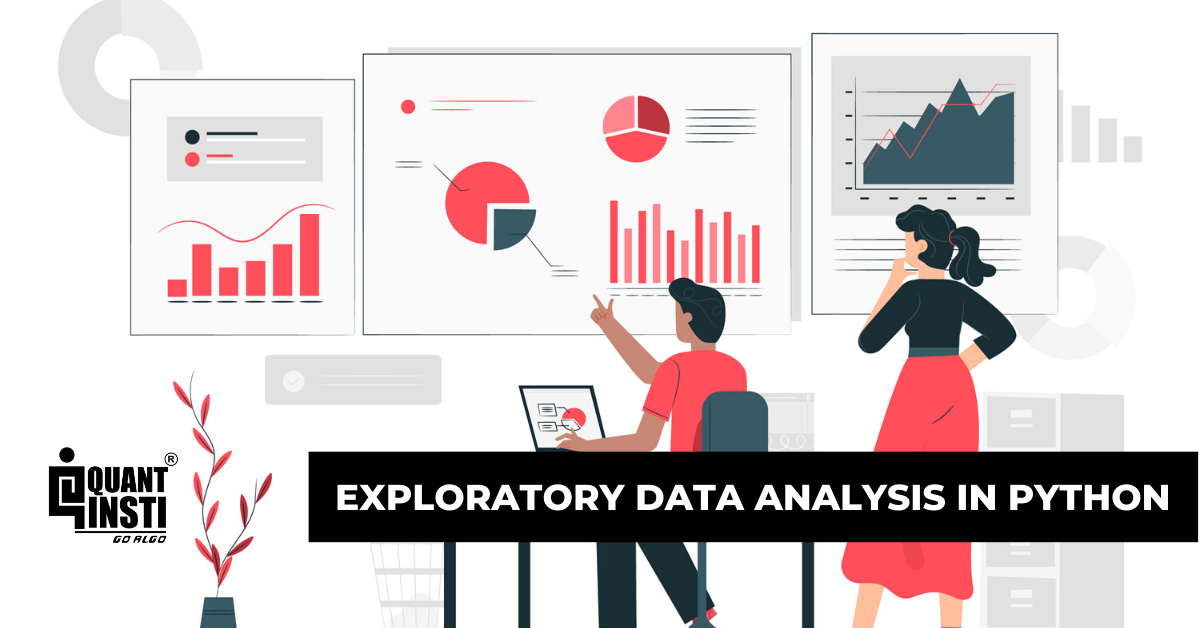












The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

Data scientists can use exploratory analysis to ensure the results they produce are valid and applicable to any desired business outcomes and goals. EDA also helps stakeholders by confirming they are asking the right questions. EDA can help answer questions about standard deviations, categorical variables, and confidence intervals. Once EDA is complete and insights are drawn, its features can then be used for more sophisticated data analysis or modeling, including machine learning.

We use Students Performance in Exams dataset in United state. Dataset url: https://www.kaggle.com/spscientist/students-performance-in-exams

#####**Content**
This data set consists of the marks secured by the students in various subjects.

#####**Acknowledgements**
http://roycekimmons.com/tools/generated_data/exams
#####**Inspiration**
To understand the influence of the parents background, test preparation etc on students performance


##Load the dataset

In [11]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import networkx as nx

url='https://raw.githubusercontent.com/mdforhadcse/Data-Science-project/main/StudentsPerformance.csv'
df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Data Shape

In [12]:
df.shape

(1000, 8)

In [13]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

##Checking Null Value

In [14]:
df.isnull().values.any()

False

##Description of the dataset

In [15]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##Count the number of distinct observations

In [16]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##Correlation

In [17]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


##Visualize the attribute

####Visualize the of Gender attribute

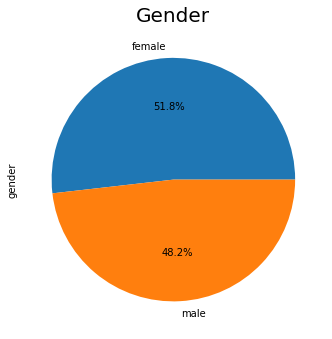

In [22]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%")

####Visualize the Ethinicity attribute

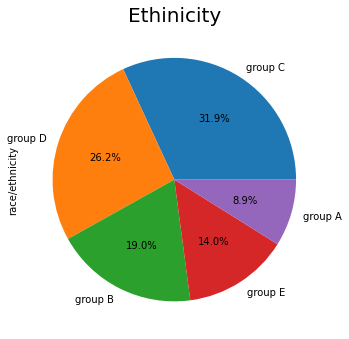

In [23]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)

plt.subplot(142)
plt.title('Ethinicity',fontsize = 20)
df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

####Visualize the Lunch attribute

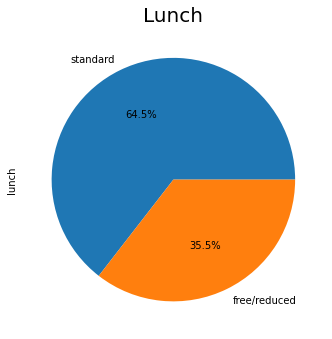

In [24]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Lunch',fontsize = 20)
df['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

####Visualize the Parental-Education attribute

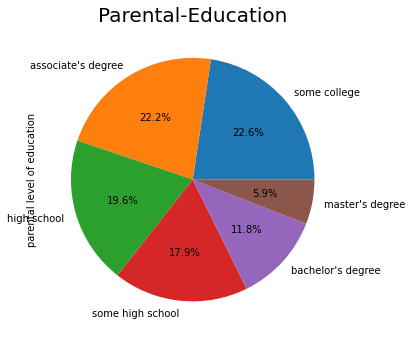

In [25]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Parental-Education',fontsize = 20)
df['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")

##Analysis the data

####Heat map

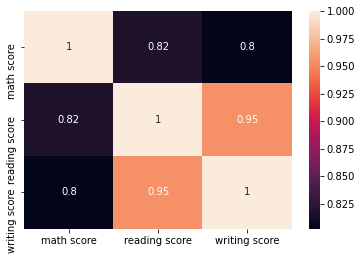

In [26]:
correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

##Distribution plot

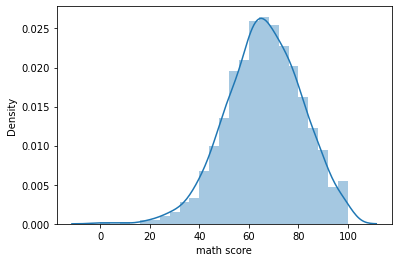

In [31]:
sns.distplot(df['math score'])

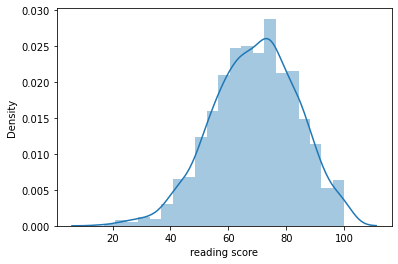

In [32]:
sns.distplot(df['reading score'])

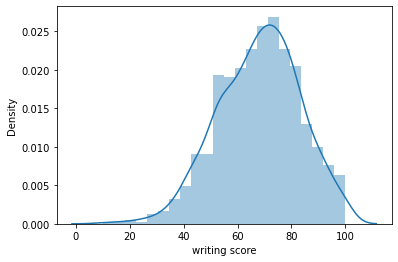

In [33]:
sns.distplot(df['writing score'])

####using diffrent plotting methods understand the variable relationships

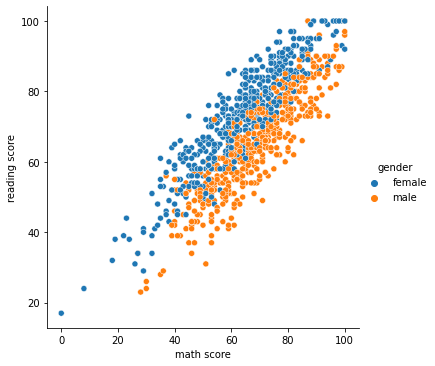

In [37]:
sns.relplot(x='math score',y='reading score',hue='gender',data=df)

## Adding attribute "mean score"

In [38]:
df["mean score"] = ((df['math score'] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


##Box plot of whole dataset

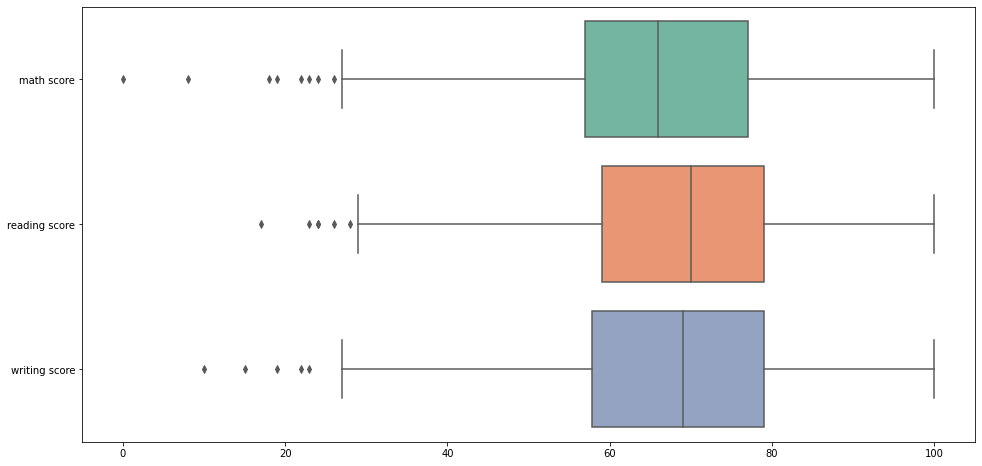

In [36]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

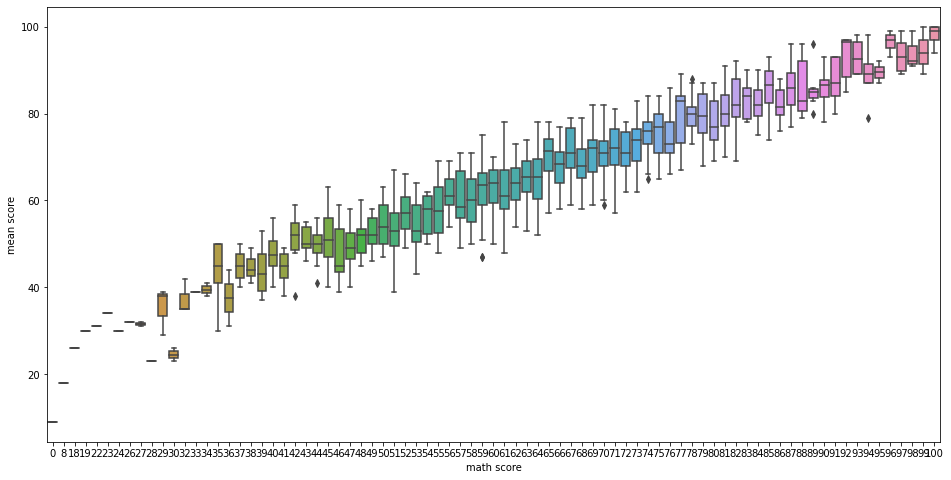

In [41]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="math score", y="mean score", data=df)

##Categorical box plot

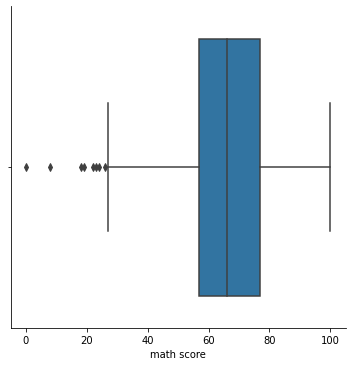

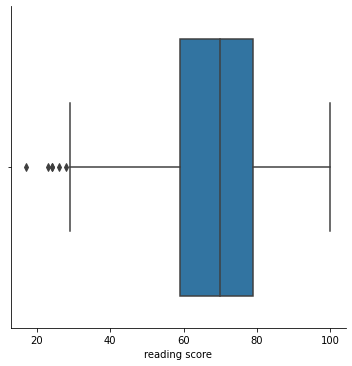

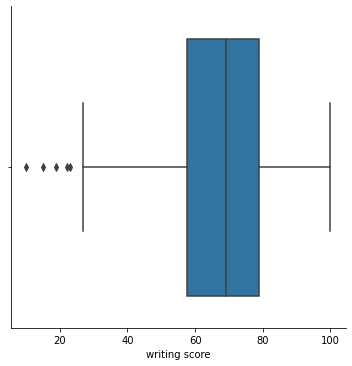

In [35]:
sns.catplot(x='math score',kind='box',data=df)
sns.catplot(x='reading score',kind='box',data=df)
sns.catplot(x='writing score',kind='box',data=df)

<Figure size 1152x576 with 0 Axes>

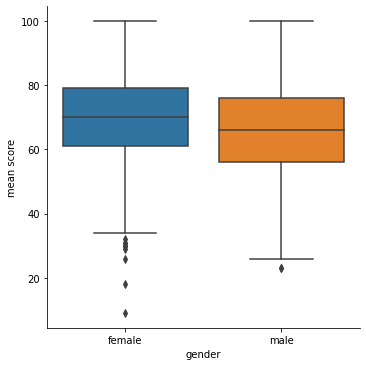

In [40]:
plt.figure(figsize=(16, 8))
ax=sns.catplot(x="gender", y="mean score", kind="box", data=df)


##Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e503f98d0>,
      dtype=object)

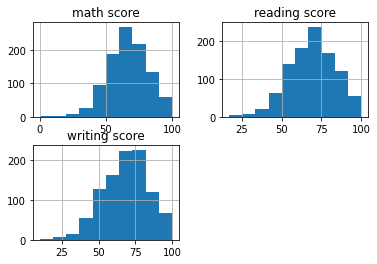

In [28]:
df.hist()

##Pairplot

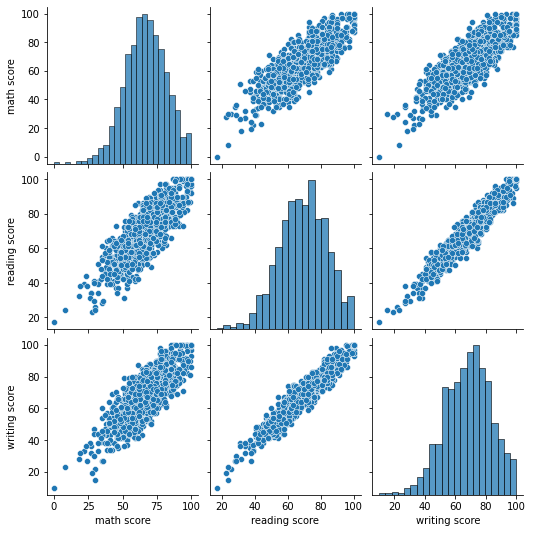

In [29]:
sns.pairplot(df)

##Jointplot

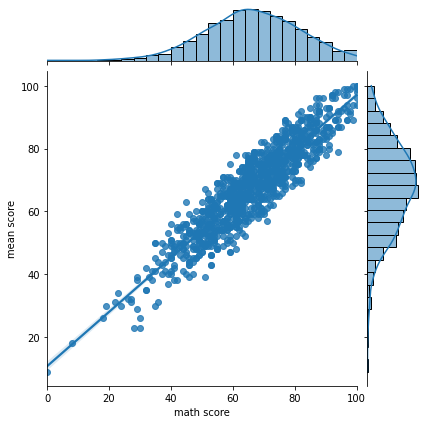

In [42]:
sns.jointplot(x="math score", y="mean score", data=df, kind="reg");

##Time series plot

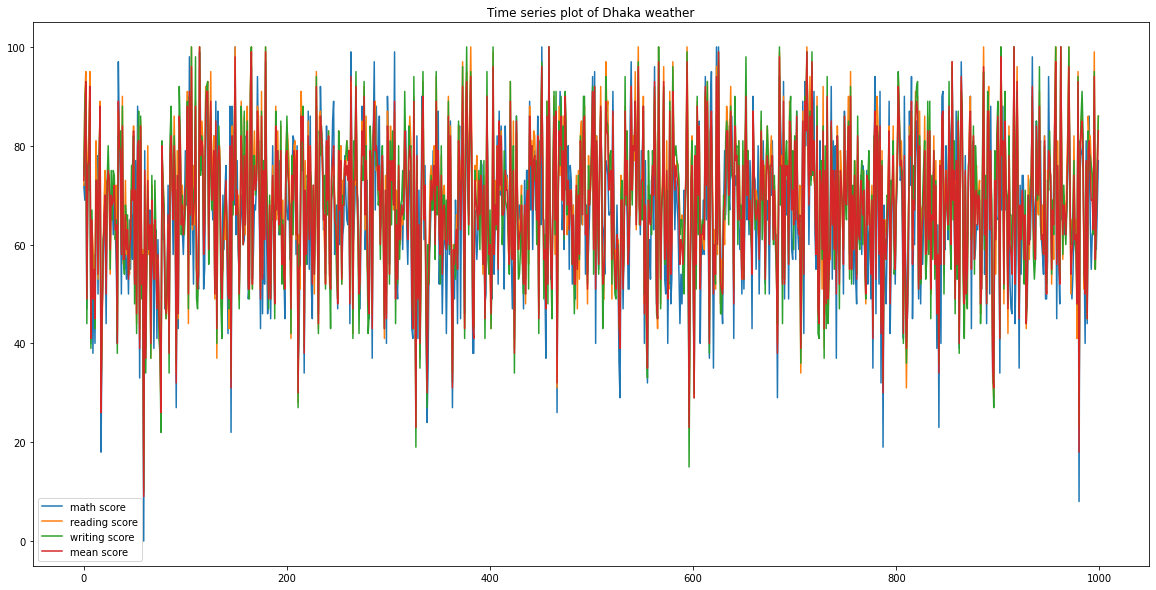

In [43]:
import matplotlib.pyplot as plt

df.plot(figsize=(20,10))
plt.title("Time series plot of Dhaka weather")
plt.show()

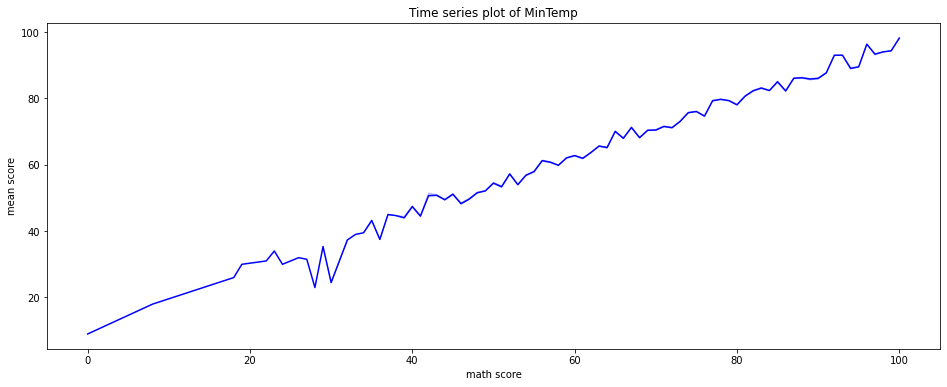

In [46]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of MinTemp')
ax = sns.lineplot(x="math score", y="mean score",ci=10,color="blue",data=df)